# 随机森林2（回归）

## 重要参数、属性与接口

## criterion （见前决策树中的criterion）

In [1]:
from sklearn.datasets import load_boston #一个标签是连续性变量的数据集
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
boston = load_boston()

In [4]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [6]:
regressor = RandomForestRegressor(n_estimators=100,random_state=0) #实例化
cross_val_score(regressor,boston.data,boston.target,cv=10
               ,scoring="neg_mean_squared_error"
               ) #交叉验证

array([-11.22504076,  -5.3945749 ,  -4.74755867, -22.54699078,
       -12.31243335, -17.18030718,  -6.94019868, -94.14567212,
       -28.541145  , -14.6250416 ])

In [7]:
#sklearn当中的模型评估指标（打分）列表
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

# 实例：用随机森林回归填补缺失值

在sklearn中，我们可以使用sklearn.impute.SimpleImputer来轻松地填补缺失值

**1、导入需要的库**

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston #一个标签是连续性变量的数据集
# from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer #用来填补缺失值的类

**2、以波士顿数据集为例，导入完整的数据集并探索**

In [9]:
dataset = load_boston()

In [10]:
dataset.data.shape

(506, 13)

In [13]:
dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [14]:
dataset.target.shape

(506,)

In [16]:
#总共506*13=6578个数据
X_full,y_full = dataset.data,dataset.target
n_samples = X_full.shape[0]
n_features = X_full.shape[1]

**3、为完整数据集放入缺失值**

In [17]:
#首先确定我们希望放入的缺失数据的比例，在这里我们假设是50%，那总共就要有3289个数据缺失

rng = np.random.RandomState(0) #随机数种子
missing_rate = 0.5
n_missing_samples = int(np.floor(n_samples * n_features * missing_rate))
#np.floor向下取整，返回.0格式的浮点数


In [18]:
n_missing_samples

3289

In [19]:
#所有数据要随机遍布在数据及的各行各列当中，而一个缺失的数据会需要一个行索引和一个列索引
#如果能够创造一个数组，包含3289个分布在-506中间的行索引，和3289个分布在0-13之间的列索引，那我们就可以利用索引来为数据中的任意3289个位置赋空值
#然后我们用0，均值，随机森林来填写这些缺失值，然后查看回归的结果如何

missing_features = rng.randint(0,n_features,n_missing_samples)
#randint(下限，上限，n) 请在下限和上限之间取出n个整数

missing_samples = rng.randint(0,n_samples,n_missing_samples)

#missing_samples = rng.choice(dataset.data.shape[0],n_missing_samples,replace=False)
#我们现在采样了个数据，远远超过我们的样本量506，所以我们使用随机抽取的函数randint。
#但如果我们需要的数据量小于我们的样本量，那我们可以采用np.random.choice来抽样
#choice会随机抽取不重复的随机数，因此可以帮助我们让数据更加分散，确保数据不会集中在一些行中

In [20]:
missing_features

array([12,  5,  0, ..., 11,  0,  2])

In [22]:
missing_features.shape

(3289,)

In [21]:
missing_samples

array([150, 125,  28, ..., 132, 456, 402])

In [23]:
missing_samples.shape

(3289,)

In [27]:
X_missing = X_full.copy()
y_missing = y_full.copy()

In [28]:
X_missing

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [29]:
X_missing.shape

(506, 13)

In [30]:
X_missing[missing_samples,missing_features] = np.nan

In [31]:
X_missing

array([[       nan, 1.8000e+01,        nan, ...,        nan,        nan,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00,        nan, ...,        nan, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02,        nan, 7.0700e+00, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan, 1.1930e+01, ..., 2.1000e+01,        nan,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ...,        nan, 3.9690e+02,
        7.8800e+00]])

In [33]:
X_missing.shape

(506, 13)

In [34]:
X_missing = pd.DataFrame(X_missing)
#转换成DataFrame是为了后续方便各种操作，numpy对矩阵的运算速度快到拯救人生，
#但是在索引功能上却不如pandas来得好用

In [35]:
X_missing

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,18.0,NaN,NaN,0.538,NaN,65.2,4.0900,1.0,296.0,NaN,NaN,4.98
1,0.02731,0.0,NaN,0.0,0.469,NaN,78.9,4.9671,2.0,NaN,NaN,396.90,9.14
2,0.02729,NaN,7.07,0.0,NaN,7.185,61.1,NaN,2.0,242.0,NaN,NaN,NaN
3,NaN,NaN,NaN,0.0,0.458,NaN,45.8,NaN,NaN,222.0,18.7,NaN,NaN
4,NaN,0.0,2.18,0.0,NaN,7.147,NaN,NaN,NaN,NaN,18.7,NaN,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,NaN,NaN,NaN,0.0,0.573,NaN,69.1,NaN,1.0,NaN,21.0,NaN,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,NaN,396.90,9.08
503,NaN,NaN,11.93,NaN,0.573,6.976,91.0,NaN,NaN,NaN,21.0,NaN,5.64
504,0.10959,0.0,11.93,NaN,0.573,NaN,89.3,NaN,1.0,NaN,21.0,393.45,6.48


**4、使用0和均值填补缺失值**

In [37]:
#使用均值进行填补
imp_mean = SimpleImputer(missing_values=np.nan,strategy='mean') #strategy有多种情况可百度
X_missing_mean = imp_mean.fit_transform(X_missing) #训练fit+导出predict  >>> 特殊的接口 fit_transform

In [38]:
X_missing_mean

array([[3.62757895e+00, 1.80000000e+01, 1.11634641e+01, ...,
        1.85211921e+01, 3.52741952e+02, 4.98000000e+00],
       [2.73100000e-02, 0.00000000e+00, 1.11634641e+01, ...,
        1.85211921e+01, 3.96900000e+02, 9.14000000e+00],
       [2.72900000e-02, 1.07229508e+01, 7.07000000e+00, ...,
        1.85211921e+01, 3.52741952e+02, 1.29917666e+01],
       ...,
       [3.62757895e+00, 1.07229508e+01, 1.19300000e+01, ...,
        2.10000000e+01, 3.52741952e+02, 5.64000000e+00],
       [1.09590000e-01, 0.00000000e+00, 1.19300000e+01, ...,
        2.10000000e+01, 3.93450000e+02, 6.48000000e+00],
       [4.74100000e-02, 0.00000000e+00, 1.19300000e+01, ...,
        1.85211921e+01, 3.96900000e+02, 7.88000000e+00]])

In [39]:
X_missing_mean.shape

(506, 13)

In [40]:
pd.DataFrame(X_missing_mean).isnull()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False


In [41]:
#布尔值 False 0  True 1
pd.DataFrame(X_missing_mean).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [42]:
#使用0进行填补
imp_0 = SimpleImputer(missing_values=np.nan,strategy="constant",fill_value=0)
X_missing_0 = imp_0.fit_transform(X_missing)

In [43]:
X_missing_0

array([[0.0000e+00, 1.8000e+01, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [0.0000e+00, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 0.0000e+00,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 0.0000e+00, 3.9690e+02,
        7.8800e+00]])

In [44]:
pd.DataFrame(X_missing_0)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00000,18.0,0.00,0.0,0.538,0.000,65.2,4.0900,1.0,296.0,0.0,0.00,4.98
1,0.02731,0.0,0.00,0.0,0.469,0.000,78.9,4.9671,2.0,0.0,0.0,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.000,7.185,61.1,0.0000,2.0,242.0,0.0,0.00,0.00
3,0.00000,0.0,0.00,0.0,0.458,0.000,45.8,0.0000,0.0,222.0,18.7,0.00,0.00
4,0.00000,0.0,2.18,0.0,0.000,7.147,0.0,0.0000,0.0,0.0,18.7,0.00,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.00000,0.0,0.00,0.0,0.573,0.000,69.1,0.0000,1.0,0.0,21.0,0.00,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,0.0,396.90,9.08
503,0.00000,0.0,11.93,0.0,0.573,6.976,91.0,0.0000,0.0,0.0,21.0,0.00,5.64
504,0.10959,0.0,11.93,0.0,0.573,0.000,89.3,0.0000,1.0,0.0,21.0,393.45,6.48


**5、使用随机森林填补缺失值**

In [ ]:
"""
对于一个有n个特征的数据来说，其中特征T有缺失值，我们就把特征T当做标签，
其他n-1个特征和原本的标签组成新的特征矩阵。那对于T来说，它没有缺失的部分，
就是我们的Y_train，这部分数据既有标签也有特征，而它缺失的部分，
只有特征没有标签，就是我们需要预测的部分。

特征T不缺失的值对应其他n-1个特征 + 本来的标签：X_train
特征T不缺失的值：Y_train

特征T缺失的值对应其他n-1个特征 + 本来的标签：X_test
特征T缺失的值：未知，我们需要预测的Y_test

这种做法，对于某一个特征大量缺失，其他特征却很完整的情况，非常适用。

那如果数据中除了特征T之外，其他特征也有缺失值怎么办？
答案是遍历所有的特征，从缺失值最少的开始进行填补（因为填补缺失值最少的特征所需要的准确信息最少）。
填补一个特征时，先将其他特征的缺失值用0代替，每完成一次回归预测，就将预测值放到原本的特征矩阵中，
再继续填补下一个特征。每一次填补完毕，有缺失值的特征会减少一个，所以每次循环后，需要用0来填补的特征就越来越少。
当进行到最后一个特征时（这个特征应该是所有特征中缺失值最多的），已经没有任何其他特征需要用0来进行填补了，
而我们已经使用回归为其他特征填补了大量有效信息，可以用来填补缺失最多的特征。

遍历所有的特征后，数据就完整，不再有缺失值了。

"""

In [45]:
X_missing_reg = X_missing.copy()

In [46]:
#找出数据集中，缺失值从小到大排列的特征们的顺序,有了这些特征的索引
sortindex = np.argsort(X_missing_reg.isnull().sum(axis=0)).values

In [48]:
X_missing_reg.isnull().sum(axis=0) #按列加和

0     200
1     201
2     200
3     203
4     202
5     201
6     185
7     197
8     196
9     197
10    204
11    214
12    189
dtype: int64

In [50]:
np.sort(X_missing_reg.isnull().sum(axis=0))

array([185, 189, 196, 197, 197, 200, 200, 201, 201, 202, 203, 204, 214],
      dtype=int64)

In [49]:
#argsort返回：从小到大排序的顺序所对应的索引
np.argsort(X_missing_reg.isnull().sum(axis=0))

0      6
1     12
2      8
3      7
4      9
5      0
6      2
7      1
8      5
9      4
10     3
11    10
12    11
dtype: int64

In [47]:
sortindex

array([ 6, 12,  8,  7,  9,  0,  2,  1,  5,  4,  3, 10, 11], dtype=int64)

In [51]:
X_missing_reg.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,18.0,NaN,NaN,0.538,NaN,65.2,4.0900,1.0,296.0,NaN,NaN,4.98
1,0.02731,0.0,NaN,0.0,0.469,NaN,78.9,4.9671,2.0,NaN,NaN,396.9,9.14
2,0.02729,NaN,7.07,0.0,NaN,7.185,61.1,NaN,2.0,242.0,NaN,NaN,NaN
3,NaN,NaN,NaN,0.0,0.458,NaN,45.8,NaN,NaN,222.0,18.7,NaN,NaN
4,NaN,0.0,2.18,0.0,NaN,7.147,NaN,NaN,NaN,NaN,18.7,NaN,5.33


**先单独看看整个过程吧。。。**

In [52]:
#构建我们的新特征矩阵（没有被选中去填充的特征 + 原始的标签）
#和新标签（被选中去填充的特征）
df = X_missing_reg

In [54]:
#新标签
fillc = df.iloc[:,6]    

In [55]:
fillc

0      65.2
1      78.9
2      61.1
3      45.8
4       NaN
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505     NaN
Name: 6, Length: 506, dtype: float64

In [56]:
#新特征矩阵
df = pd.concat([df.iloc[:,df.columns != 6],pd.DataFrame(y_full)],axis=1)

In [57]:
df

,0,1,2,3,4,5,7,8,9,10,11,12,0
0,NaN,18.0,NaN,NaN,0.538,NaN,4.0900,1.0,296.0,NaN,NaN,4.98,24.0
1,0.02731,0.0,NaN,0.0,0.469,NaN,4.9671,2.0,NaN,NaN,396.90,9.14,21.6
2,0.02729,NaN,7.07,0.0,NaN,7.185,NaN,2.0,242.0,NaN,NaN,NaN,34.7
3,NaN,NaN,NaN,0.0,0.458,NaN,NaN,NaN,222.0,18.7,NaN,NaN,33.4
4,NaN,0.0,2.18,0.0,NaN,7.147,NaN,NaN,NaN,18.7,NaN,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,NaN,NaN,NaN,0.0,0.573,NaN,NaN,1.0,NaN,21.0,NaN,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,2.2875,1.0,273.0,NaN,396.90,9.08,20.6
503,NaN,NaN,11.93,NaN,0.573,6.976,NaN,NaN,NaN,21.0,NaN,5.64,23.9
504,0.10959,0.0,11.93,NaN,0.573,NaN,NaN,1.0,NaN,21.0,393.45,6.48,22.0


In [58]:
#在新特征矩阵中，对含有缺失值的列，进行0的填补
df_0 = SimpleImputer(missing_values=np.nan
                    ,strategy="constant"
                    ,fill_value=0).fit_transform(df)

In [60]:
pd.DataFrame(df_0)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00000,18.0,0.00,0.0,0.538,0.000,4.0900,1.0,296.0,0.0,0.00,4.98,24.0
1,0.02731,0.0,0.00,0.0,0.469,0.000,4.9671,2.0,0.0,0.0,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.000,7.185,0.0000,2.0,242.0,0.0,0.00,0.00,34.7
3,0.00000,0.0,0.00,0.0,0.458,0.000,0.0000,0.0,222.0,18.7,0.00,0.00,33.4
4,0.00000,0.0,2.18,0.0,0.000,7.147,0.0000,0.0,0.0,18.7,0.00,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.00000,0.0,0.00,0.0,0.573,0.000,0.0000,1.0,0.0,21.0,0.00,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,2.2875,1.0,273.0,0.0,396.90,9.08,20.6
503,0.00000,0.0,11.93,0.0,0.573,6.976,0.0000,0.0,0.0,21.0,0.00,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,0.000,0.0000,1.0,0.0,21.0,393.45,6.48,22.0


In [62]:
#找出我们的训练集和测试集
#是被选中要填充的特征中（现在是我们的标签），存在的那些值，非空值   
Ytrain = fillc[fillc.notnull()]

In [63]:
Ytrain

0      65.2
1      78.9
2      61.1
3      45.8
5      58.7
       ... 
500    79.7
501    69.1
502    76.7
503    91.0
504    89.3
Name: 6, Length: 321, dtype: float64

In [64]:
#是被选中要填充的特征中（现在是我们的标签），不存在的那些值，是空值   
#我们需要的不是Ytest的值，需要的是Ytest所带的索引
Ytest = fillc[fillc.isnull()]

In [65]:
Ytest

4     NaN
8     NaN
9     NaN
10    NaN
14    NaN
       ..
482   NaN
488   NaN
493   NaN
494   NaN
505   NaN
Name: 6, Length: 185, dtype: float64

In [66]:
Ytrain.index

Int64Index([  0,   1,   2,   3,   5,   6,   7,  11,  12,  13,
            ...
            495, 496, 497, 498, 499, 500, 501, 502, 503, 504],
           dtype='int64', length=321)

In [69]:
Ytest.values

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [70]:
#在新特征矩阵上，被选出来的要填充的非空值所对应的记录，就是要上面的索引
Xtrain = df_0[Ytrain.index,:]

In [71]:
#在新特征矩阵上，被选出来的要填充的空值所对应的记录
Xtest = df_0[Ytest.index,:]

In [72]:
#用随机森林回归来填补缺失值
rfc = RandomForestRegressor(n_estimators=100) #实例化
rfc = rfc.fit(Xtrain,Ytrain) #导入训练集进行训练
Ypredict = rfc.predict(Xtest) #用predict接口将Xtest导入，得到我们的预测结果（回归结果），这个预测结果就是我们要用来填补空值的值

In [74]:
Ypredict.shape

(185,)

In [75]:
X_missing_reg.loc[X_missing_reg.iloc[:,6].isnull(),6]

4     NaN
8     NaN
9     NaN
10    NaN
14    NaN
       ..
482   NaN
488   NaN
493   NaN
494   NaN
505   NaN
Name: 6, Length: 185, dtype: float64

In [77]:
#将填补好的特征值返回到我们的原始的特征矩阵中
X_missing_reg.loc[X_missing_reg.iloc[:,6].isnull(),6] = Ypredict

In [78]:
X_missing_reg

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,18.0,NaN,NaN,0.538,NaN,65.200,4.0900,1.0,296.0,NaN,NaN,4.98
1,0.02731,0.0,NaN,0.0,0.469,NaN,78.900,4.9671,2.0,NaN,NaN,396.90,9.14
2,0.02729,NaN,7.07,0.0,NaN,7.185,61.100,NaN,2.0,242.0,NaN,NaN,NaN
3,NaN,NaN,NaN,0.0,0.458,NaN,45.800,NaN,NaN,222.0,18.7,NaN,NaN
4,NaN,0.0,2.18,0.0,NaN,7.147,58.457,NaN,NaN,NaN,18.7,NaN,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,NaN,NaN,NaN,0.0,0.573,NaN,69.100,NaN,1.0,NaN,21.0,NaN,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700,2.2875,1.0,273.0,NaN,396.90,9.08
503,NaN,NaN,11.93,NaN,0.573,6.976,91.000,NaN,NaN,NaN,21.0,NaN,5.64
504,0.10959,0.0,11.93,NaN,0.573,NaN,89.300,NaN,1.0,NaN,21.0,393.45,6.48


In [79]:
X_missing_reg.isnull().sum()

0     200
1     201
2     200
3     203
4     202
5     201
6       0
7     197
8     196
9     197
10    204
11    214
12    189
dtype: int64

**可以看到，第6列的空值已经为0了**

**接下来是完整的过程：**

In [85]:
sortindex = sortindex[1:] #因为第6列已经运行过了在上面

In [86]:
sortindex

array([12,  8,  7,  9,  0,  2,  1,  5,  4,  3, 10, 11], dtype=int64)

In [87]:
for i in sortindex:
    
    #构建我们的新特征矩阵和新标签
    df = X_missing_reg
    fillc = df.iloc[:,i]
    df = pd.concat([df.iloc[:,df.columns != i],pd.DataFrame(y_full)],axis=1)
    
    #在新特征矩阵中，对含有缺失值的列，进行0的填补
    df_0 = SimpleImputer(missing_values=np.nan,strategy="constant",fill_value=0).fit_transform(df)
    
    #找出我们的训练集和测试集
    Ytrain = fillc[fillc.notnull()]
    Ytest = fillc[fillc.isnull()]
    Xtrain = df_0[Ytrain.index,:]
    Xtest = df_0[Ytest.index,:]
    
    #用随机森林回归来填补缺失值
    rfc = RandomForestRegressor(n_estimators=100)
    rfc = rfc.fit(Xtrain,Ytrain)
    Ypredict = rfc.predict(Xtest)
    
    #将填补好的特征值返回到我们的原始的特征矩阵中
    X_missing_reg.loc[X_missing_reg.iloc[:,i].isnull(),i] = Ypredict

In [88]:
X_missing_reg

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.253101,18.00,6.9107,0.16,0.538000,6.69117,65.200,4.090000,1.00,296.00,18.287,388.9969,4.9800
1,0.027310,0.00,5.4002,0.00,0.469000,6.13983,78.900,4.967100,2.00,298.42,18.348,396.9000,9.1400
2,0.027290,14.62,7.0700,0.00,0.465018,7.18500,61.100,4.370230,2.00,242.00,18.037,388.2297,4.9049
3,0.099481,17.37,2.7259,0.00,0.458000,6.89272,45.800,4.572805,3.42,222.00,18.700,392.6200,6.1604
4,0.070252,0.00,2.1800,0.00,0.461094,7.14700,58.457,4.785489,3.53,239.14,18.700,392.1285,5.3300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.505974,2.52,9.9525,0.00,0.573000,6.33663,69.100,3.010134,1.00,285.40,21.000,391.3940,9.6700
502,0.045270,0.00,11.9300,0.00,0.573000,6.12000,76.700,2.287500,1.00,273.00,19.173,396.9000,9.0800
503,0.640543,1.81,11.9300,0.23,0.573000,6.97600,91.000,2.625270,4.40,353.42,21.000,388.0471,5.6400
504,0.109590,0.00,11.9300,0.06,0.573000,6.37500,89.300,2.656402,1.00,244.54,21.000,393.4500,6.4800


# 对比四种缺失值填充

In [94]:
X = [X_full,X_missing_mean,X_missing_0,X_missing_reg]
mse=[]

for x in X:
    estimator = RandomForestRegressor(random_state=0,n_estimators=100) #实例化
    scores = cross_val_score(estimator,x,y_full,scoring="neg_mean_squared_error",cv=5).mean()
    mse.append(scores * -1)    

In [95]:
mse #MSE越小越好

[21.571667100368845, 40.848037216676374, 49.626793201980185, 20.35427313092602]

In [96]:
[*zip(["X_full","X_missing_mean","X_missing_0","X_missing_reg"],mse)]

[('X_full', 21.571667100368845),
 ('X_missing_mean', 40.848037216676374),
 ('X_missing_0', 49.626793201980185),
 ('X_missing_reg', 20.35427313092602)]

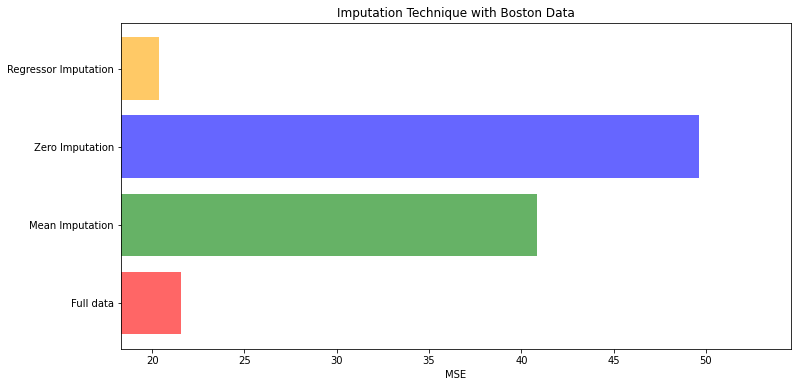

In [98]:
x_labels = ['Full data','Mean Imputation','Zero Imputation','Regressor Imputation']

colors = ['r','g','b','orange']

plt.figure(figsize=(12,6)) #画出画布
ax = plt.subplot(111) #plt.subplot添加子图 111 第一行第一列第一个表

for i in np.arange(len(mse)):
    ax.barh(i,mse[i],color=colors[i],alpha=0.6,align="center") #bar h横着的
    
ax.set_title("Imputation Technique with Boston Data")
ax.set_xlim(left=np.min(mse) * 0.9,right=np.max(mse) * 1.1)
ax.set_yticks(np.arange(len(mse)))
ax.set_xlabel("MSE")
# ax.invert_yaxis()
ax.set_yticklabels(x_labels)
plt.show()    